<a href="https://colab.research.google.com/github/atharva0300/Indonesian-News-Summarizer-NLP/blob/main/text_summarization_final_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text summarization with Simple Transformers T5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['LC_ALL'] = 'C.UTF-8'
os.environ['LANG'] = 'C.UTF-8'

In [3]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [4]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [5]:
! pip install -q nltk==3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [6]:
pip install rouge -q

In [7]:
#pip install simpletransformers -q
#! pip install simplet5 -q

In [8]:
pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00


In [9]:
#! pip install simplet5 -q

## Import libraries <a class="anchor" id="Import-libraries"></a>

In [10]:
import gc
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split



import torch



print('Pytorch version: %s'  % torch.__version__)

Pytorch version: 2.2.1+cu121


In [11]:
warnings.simplefilter('ignore')
pd.set_option('display.max_colwidth', 10000)
cuda =  torch.cuda.is_available()

In [12]:
from datasets import load_dataset

dataset = load_dataset("iqballx/indonesian_news_datasets" , split = "train")
df = dataset.to_pandas()
df = df.dropna().reset_index(drop=True)

Generating train split: 0 examples [00:00, ? examples/s]

In [13]:
df.columns

Index(['id', 'source', 'title', 'image', 'url', 'content', 'date', 'embedding',
       'created_at', 'updated_at', 'summary'],
      dtype='object')

In [14]:
df.head(1)

id source  \
0  83  tempo   

                                                                                    title  \
0  Depo Plumpang Terbakar, Anggota DPR Minta Pertamina Pastikan Pasokan BBM Tak Terganggu   

                                                                image  \
0  https://statik.tempo.co/data/2023/03/04/id_1186060/1186060_720.jpg   

                                                                                                                            url  \
0  https://nasional.tempo.co/read/1698528/depo-plumpang-terbakar-anggota-dpr-minta-pertamina-pastikan-pasokan-bbm-tak-terganggu   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          content  \
0  TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI Rofik Hananto menyayangkan terjadinya insiden kebakaran yang disebabkan oleh bocornya depo Plumpang, Jakarta Utara, pada Jumat, 3 Maret 2023."Turut berbela sungkawa terhadap masyarakat sipil yang terdampak, apalagi ini daerah padat penduduk. Pertamina harus tanggung jawab," kata dia dalam keterangan di Jakarta Sabtu, 4 Maret 2024.Rofik mengatakan Pertamina serta pihak terkait harus memastikan keselamatan dan keamanan warga yang tinggal di sekitar lokasi.Pipa BBM yang terbakar itu merupakan bagian dari Terminal Bahan Bakar Minyak (TBBM) Plumpang. TBBM Plumpang dinilai sebagai salah satu terminal BBM terpenting di Indonesia, sehingga Rofik juga menegaskan Pertamina harus memastikan pasokan bahan bakar minyak tetap aman meski ada insiden tersebut."Plumpang menyuplai sekitar 20 persen kebutuhan BBM harian di Indonesia, atau sekitar 25 persen dari total kebutuhan SPBU Pertamina. Maka tindakan selanjutnya adalah bagaimana memastikan suplai BBM tidak terganggu," katanya.Rofik juga menyinggung kejadian kilang minyak milik Pertamina yang sebelumnya pernah terjadi kejadian serupa, seperti Kilang Balikpapan pada Maret 2022 lalu. Terhitung 2 tahun terakhir ini, kata dia, sudah 5 fasilitas migas milik

In [15]:
df = df.drop(['id' , 'source' , 'title' , 'image',  'url' , 'date' , 'embedding' , 'created_at' , 'updated_at'], axis=1)
df = df.reset_index(drop=True)

In [16]:
df.columns

Index(['content', 'summary'], dtype='object')

In [17]:
df.shape

(32127, 2)

In [18]:
# drop the columns in summary series with the type none
# Drop None values from the 'summary' column
df = df.dropna(subset=['summary'])

# Reset the index
df = df.reset_index(drop=True)

In [19]:
# drop the columns in summary series with the type none
# Drop None values from the 'summary' column
df = df.dropna(subset=['content'])

# Reset the index
df = df.reset_index(drop=True)

In [20]:
df.shape

(32127, 2)

In [21]:
# keep only the top 10000 rows
df = df.head(10000)

In [22]:
len(df)

10000

In [23]:
# df = pd.read_csv('/content/drive/MyDrive/nlp_dataset/news_dataset_2.csv', encoding='ISO-8859-1').dropna().reset_index(drop=True)

## EDA <a class="anchor" id="EDA"></a>

In [24]:
display(df.head(1))

,content,summary
0,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI Rofik Hananto menyayangkan terjadinya insiden kebakaran yang disebabkan oleh bocornya depo Plumpang, Jakarta Utara, pada Jumat, 3 Maret 2023.""Turut berbela sungkawa terhadap masyarakat sipil yang terdampak, apalagi ini daerah padat penduduk. Pertamina harus tanggung jawab,"" kata dia dalam keterangan di Jakarta Sabtu, 4 Maret 2024.Rofik mengatakan Pertamina serta pihak terkait harus memastikan keselamatan dan keamanan warga yang tinggal di sekitar lokasi.Pipa BBM yang terbakar itu merupakan bagian dari Terminal Bahan Bakar Minyak (TBBM) Plumpang. TBBM Plumpang dinilai sebagai salah satu terminal BBM terpenting di Indonesia, sehingga Rofik juga menegaskan Pertamina harus memastikan pasokan bahan bakar minyak tetap aman meski ada insiden tersebut.""Plumpang menyuplai sekitar 20 persen kebutuhan BBM harian di Indonesia, atau sekitar 25 persen dari total kebutuhan SPBU Pertamina. Maka tindakan selanjutnya adalah bagaimana memastikan suplai BBM tidak terganggu,"" katanya.Rofik juga menyinggung kejadian kilang minyak milik Pertamina yang sebelumnya pernah terjadi kejadian serupa, seperti Kilang Balikpapan pada Maret 2022 lalu. Terhitung 2 tahun terakhir ini, kata dia, sudah 5 fasilitas migas milik Pertamina mengalami insiden kebakaran.""Menyayangkan terjadinya musibah kebakaran ini, apalagi insiden kebakaran bukan kali pertama di fasilitas migas, ini terus berulang. Pertamina harus benahi sistem pengamanan dan SOP yang ada,"" kata dia.Rofik mengharapkan adanya pembenahan menyeluruh terhadap sistem pengamanan serta SOP yang ada dalam lingkup Pertamina untuk mengamankan baik fasilitas migas, pekerja, maupun masyarakat sekitar. Menurutnya pembenahan diperlukan agar Pertamina tidak abai terhadap aspek pengamanan fasilitas migas.""Investigasi menyeluruh dan tuntas, serta meminta komitmen Pertamina memperbaiki sistem keamanan kilang minyak maupun depo BBM, seringnya kebakaran terjadi mengindikasikan Pertamina abai terhadap pengamanan kilang,"" ujarnya.Pilihan Editor:Profil Depo Pertamina Plumpang, Pemasok 20 Persen Pasokan BBM di Seluruh Indonesia","Anggota Komisi VII DPR RI Rofik Hananto menyayangkan terjadinya insiden kebakaran di Depo Plumpang, Jakarta Utara, pada Jumat, 3 Maret 2023. Rofik menegaskan Pertamina harus memastikan pasokan bahan bakar minyak tetap aman meski ada insiden tersebut. Depo Plumpang merupak"


In [25]:
# spliiting the data into train , test and eval

train, test = train_test_split(df, test_size=0.2, random_state=42)
train, eval = train_test_split(train, test_size=0.2, random_state=42)

# reset indexes
train = train.reset_index(drop=True)
test = test.reset_index(drop = True)
eval = eval.reset_index(drop = True)

In [26]:
del df

In [27]:
import json

print('train length : ' , len(train))
print('test length : ' , len(test))
print('eval length : ' , len(eval))

train length :  6400
test length :  2000
eval length :  1600


In [28]:
train['prefix'] = 'summarize: '
test['prefix'] = 'summarize: '
eval['prefix'] = 'summarize: '

In [29]:
# average length of the content
content_length_list = []
summary_length_list = []
decrease_percentage_list = []


for i in range(len(train)) :
  content_string = train['content'][i]
  summary_string = train['summary'][i]

  content_length_list.append(len(content_string.split()))
  summary_length_list.append(len(summary_string.split()))
  decrease_percentage_list.append( ( ( len(content_string.split()) - len(summary_string.split())) / len(content_string.split()) ) * 100 )

# calculating the averages
average_content_length = sum(content_length_list) / len(content_length_list)
average_summary_length = sum(summary_length_list) / len(summary_length_list)
average_decrease_percentage = sum(decrease_percentage_list) / len(decrease_percentage_list)


print('Average Content length : ' , average_content_length)
print('Average Summary Length : ' , average_summary_length)
print('Average Percentage decrease in the length : ' , average_decrease_percentage)

Average Content length :  326.56828125
Average Summary Length :  62.37140625
Average Percentage decrease in the length :  77.42864843153134


In [30]:
# calculating median values
import statistics

median_content_length = statistics.median(content_length_list)
median_summary_length = statistics.median(summary_length_list)
median_decrease_percentage = statistics.median(decrease_percentage_list)

print('Median Content length : ' , median_content_length)
print('Median Summary length : ' , median_summary_length)
print('Median Percenatge length : ' , median_decrease_percentage)

Median Content length :  298.0
Median Summary length :  63.0
Median Percenatge length :  79.02112369337979


In [31]:
# From 10000 rows, select 100 rows randomly and plot a content_length vs summary_length graph
df_lengths = pd.DataFrame({'content_length' : content_length_list , 'summary_length' : summary_length_list , 'decrease_percentage' : decrease_percentage_list})

# take 100 rows randomly
df_sample = df_lengths.sample(n = 100 , random_state = 42)
df_sample = df_sample.reset_index(drop=True)

len(df_sample)

100

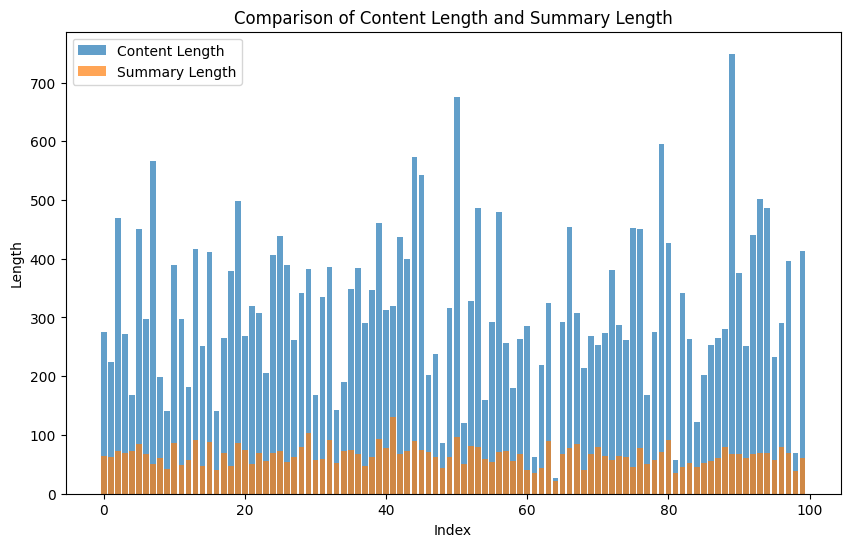

In [32]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sample.index, df_sample['content_length'], label='Content Length', alpha=0.7)
plt.bar(df_sample.index, df_sample['summary_length'], label='Summary Length', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Length')
plt.title('Comparison of Content Length and Summary Length')
plt.legend()
plt.show()

In [33]:
# Save the plot as a PNG file
plt.savefig('/content/plot_3.png')

<Figure size 640x480 with 0 Axes>

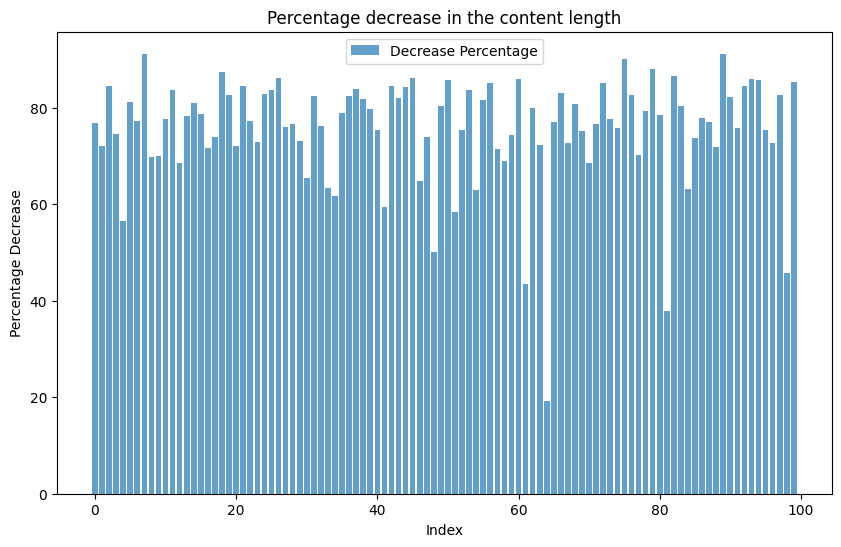

In [34]:
# From 10000 rows, select 100 rows randomly and plot a percentage_decrease in the length of the content_length vs the content_length on one axis against the index number

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sample.index, df_sample['decrease_percentage'], label='Decrease Percentage', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Percentage Decrease')
plt.title('Percentage decrease in the content length')
plt.legend()
plt.show()


In [35]:
# Save the plot as a PNG file
plt.savefig('/content/plot_2.png')

<Figure size 640x480 with 0 Axes>

In [36]:
train = train.rename(columns={'content': 'input_text', 'summary': 'target_text'}).reindex(columns=['input_text', 'target_text'])
test = test.rename(columns={'content': 'input_text', 'summary': 'target_text'}).reindex(columns=['input_text', 'target_text'])
eval = eval.rename(columns={'content': 'input_text', 'summary': 'target_text'}).reindex(columns=['input_text', 'target_text'])

In [47]:
train['input_text'] = 'summarize: ' + train['input_text']

In [48]:
eval['input_text'] = 'summarize: ' + eval['input_text']

In [49]:
train.columns

Index(['input_text', 'target_text'], dtype='object')

In [50]:
train['prefix'] = 'summarize: '
eval['prefix'] = 'summarize: '

### Training

In [51]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [52]:
pip install accelerate -U

In [ ]:
pip install simpletransformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00


In [ ]:
! pip install simplet5 -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 47.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
arviz 0.15.1 requires setuptools>=60.0.0, but you have setuptools 59.5.0 which is incompatible.
cvxpy 1.3.3 requires setuptools>65.5.1, but you have setuptools 59.5.0 which is incompatible.
simpletransformers 0.70.0 requires transformers>=4.31.0, but you have transformers 4.16.2 which is incompatible.


In [ ]:
# Parameters for T5 model training
from transformers import T5Tokenizer, T5ForConditionalGeneration
from simpletransformers.t5 import T5Model

t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")

train_params = {
    'max_seq_length': 512,
    'max_length': 128,
    'train_batch_size': 8,
    'eval_batch_size': 8,
    'num_train_epochs': 5,
    'evaluate_during_training': True,
    'evaluate_during_training_steps': 10000,
    'use_multiprocessing': False,
    'fp16': True,
    'save_steps': -1,
    'save_eval_checkpoints': True,
    'save_model_every_epoch': True,
    'no_cache': True,
    'reprocess_input_data': True,
    'overwrite_output_dir': True,
    'preprocess_inputs': False,
    'num_return_sequences': 1
}


# Initialize and train the T5 model
model_t5 = T5Model('t5', 't5-small', args=train_params, tokenizer=t5_tokenizer, use_cuda=True)
model_t5.train_model(train, eval_data=eval)
gc.collect()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


  0%|          | 0/6400 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

Running Epoch 5 of 5:   0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

7130

In [ ]:
!zip -r /content/t5_outputs.zip /content/outputs

  adding: content/outputs/ (stored 0%)
  adding: content/outputs/generation_config.json (deflated 27%)
  adding: content/outputs/checkpoint-4000-epoch-5/ (stored 0%)
  adding: content/outputs/checkpoint-4000-epoch-5/generation_config.json (deflated 27%)
  adding: content/outputs/checkpoint-4000-epoch-5/added_tokens.json (deflated 83%)
  adding: content/outputs/checkpoint-4000-epoch-5/optimizer.pt (deflated 16%)
  adding: content/outputs/checkpoint-4000-epoch-5/spiece.model (deflated 48%)
  adding: content/outputs/checkpoint-4000-epoch-5/eval_results.txt (stored 0%)
  adding: content/outputs/checkpoint-4000-epoch-5/config.json (deflated 62%)
  adding: content/outputs/checkpoint-4000-epoch-5/tokenizer_config.json (deflated 94%)
  adding: content/outputs/checkpoint-4000-epoch-5/special_tokens_map.json (deflated 85%)
  adding: content/outputs/checkpoint-4000-epoch-5/model_args.json (deflated 63%)
  adding: content/outputs/checkpoint-4000-epoch-5/scheduler.pt (deflated 56%)
  adding: conten

In [ ]:
model_t5.save_model('/content/t5_model.h5')

In [ ]:
from google.colab import files
files.download('/content/t5_outputs.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil

# Path to the zip file in Colab workspace
colab_zip_path = '/content/t5_outputs.zip'

# Destination path in Google Drive
drive_dest_path = '/content/drive/MyDrive/t5_model/'

shutil.copy(colab_zip_path, drive_dest_path)

'/content/drive/MyDrive/t5_model/t5_outputs.zip'

In [ ]:
model_t5.save_model('/content/t5_model.h5')

In [ ]:
# After training the model
model_t5.model.save_pretrained("/content/t5_model.h5")

In [ ]:
# After training the model
model_t5.model.save_weights("/content/t5_model_weights.h5")

AttributeError: 'T5ForConditionalGeneration' object has no attribute 'save_weights'

In [ ]:
import pickle

# Save the model_t5 object as a pickle file
with open('/content/model_t5.pkl', 'wb') as f:
    pickle.dump(model_t5, f)

In [ ]:
!zip -r /content/t5_model.h5.zip /content/t5_model.h5

  adding: content/t5_model.h5/ (stored 0%)
  adding: content/t5_model.h5/generation_config.json (deflated 27%)
  adding: content/t5_model.h5/config.json (deflated 62%)
  adding: content/t5_model.h5/model.safetensors (deflated 7%)


In [ ]:
import shutil

# Path to the zip file in Colab workspace
colab_zip_path = '/content/model_t5.pkl'

# Destination path in Google Drive
drive_dest_path = '/content/drive/MyDrive/t5_model/'

shutil.copy(colab_zip_path, drive_dest_path)

'/content/drive/MyDrive/t5_model/model_t5.pkl'

In [ ]:
import shutil

# Path to the zip file in Colab workspace
colab_zip_path = '/content/t5_model.h5.zip'

# Destination path in Google Drive
drive_dest_path = '/content/drive/MyDrive/t5_model/'

shutil.copy(colab_zip_path, drive_dest_path)

'/content/drive/MyDrive/t5_model/t5_model.h5.zip'

In [ ]:
files.download('/content/t5_model.h5')

### Predict

In [ ]:
pred_params = {
        'max_seq_length': 512,
        'use_multiprocessed_decoding': False
        }

model = T5Model('t5', 'outputs/best_model', args=pred_params, use_cuda=True)
pred = model.predict(list(test['input_text']))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Generating outputs:   0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
random.sample(pred, 5)

['Pemerintah akan menyalurkan bantuan sosial berupa beras dan telur selama tiga bulan di momen Ramadhan kepada keluarga penerima manfaat (KPM). Bansos beras akan dibagikan dalam bentuk 10 kilogram per masing-masing keluarga penerima manfaat (KPM). Pemerintah a',
 'Kepala PPATK, Ivan Yustiavandana, menyebut bahwa adanya transaksi yang dilakukan oleh Andhi Pramono yang dilakukan oleh KPK yang tidak mau banyak berkomentar. Ivan Yustiavandana, Kepala PPATK, menyebut bahwa ia juga menyebut bahwa keputusan tersebut t',
 'Timnas U-20 Belanda akan melawan Prancis dalam laga persahabatan Sabtu (25/3) di Pusat Sepak Bola Banus di Marbella, Spanyol. Timnas akan melawan Prancis dalam laga pertandingan di jeda internasional kali ini dan tidak lolos ke Piala Dunia U-20 2023. Hubner masuk skua',
 'Istri Pejabat Sekretariat Negara, Esha Rahmanshah Abrar, menonaktifkan sementara Kepala Subbagian Administrasi Kendaraan Biro Umum dari jabatannya dan tidak dilakukan oleh satu oknum saja. Istri Pejabat Dir

In [ ]:
!pip install sumeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 11.6 MB/s eta 0:00:00
  Created wheel for sumeval: filename=sumeval-0.2.2-py3-none-any.whl size=54546 sha256=0bbc642e7b302b818c41ccc5431bb392b8137f90fde870be667eb51ed5e65c03
  Stored in directory: /root/.cache/pip/wheels/94/08/ae/a1150487990be9a1f8530616bde7bbb288dfecd1fc75a8c930
Successfully built sumeval


In [ ]:
from sumeval.metrics.rouge import RougeCalculator

rouge = RougeCalculator(stopwords=True, lang="id")

def rouge_calc(preds, targets):
    rouge_1 = [rouge.rouge_n(summary=preds[i],references=targets[i],n=1) for i in range(len(preds))]
    rouge_2 = [rouge.rouge_n(summary=preds[i],references=targets[i],n=2) for i in range(len(preds))]
    rouge_l = [rouge.rouge_l(summary=preds[i],references=targets[i]) for i in range(len(preds))]

    return {"Rouge_1": np.array(rouge_1).mean(),
            "Rouge_2": np.array(rouge_2).mean(),
            "Rouge_L": np.array(rouge_l).mean()}

In [ ]:
rouge_calc(pred, list(test['input_text']))

{'Rouge_1': 0.23477952632911933,
 'Rouge_2': 0.17748681395203428,
 'Rouge_L': 0.19628620807304634}

#BART

In [ ]:
!pip install --upgrade transformers

In [53]:
train_list_dict = []
for i in range(len(train)) :
  temp = {}
  temp['input_text'] = train['input_text'][i]
  temp['target_text'] = train['target_text'][i]
  train_list_dict.append(temp)

eval_list_dict = []
for i in range(len(eval)) :
  temp = {}
  temp['input_text'] = eval['input_text'][i]
  temp['target_text'] = eval['target_text'][i]
  eval_list_dict.append(temp)


In [54]:
# Print the first example from each list to verify the format
print("First training example:", train_list_dict[0])
print("First evaluation example:", eval_list_dict[0])

# Check the length of the lists
print("Number of training examples:", len(train_list_dict))
print("Number of evaluation examples:", len(eval_list_dict))

First training example: {'input_text': 'summarize: Jakarta, CNBC masih nambah Indonesia cabai lebih - Harga cabai terpantau harus bergerak naik. Hari Menurutnya, ini, Senin (13/3/2023 pukul 16.32 di WIB), Panel Harga Badan Pangan menunjukkan, harga cabai rawit merah melonjak ke Rp67.290 per kg. Sepekan jamur, lalu, 6 Maret 2023, petani. harga cabai rawit merah masih bertengger di di Rp62.8140 per kg. memahami, patek terpantau Rp62.8140 Harga saat ini Rp103.930 sudah melampaui harga Harga pada Maret 2022 lalu yang masih di Rp59.270 per dibandingkan kg. dari Harga tertinggi dibandingkan hari ini mencapai Rp103.930 Indonesia jadi per kg di ini, Kalimantan Utara. Sementara itu, meski turun tipis, harga cabai merah keriting yang hari ini di Rp43.840 per kg, masih lebih mahal terpantau dibandingkan Rp103.930 sepekan lalu yang tercatat di Rp42.870 per kalau kg. Harga tertinggi cabai normal, hari ini bagi mencapai Rp64.320 per kg di Kalimantan Utara. Ketua Asosiasi Agribisnis masif. Cabai Jaka

In [ ]:
import shutil

# Specify the path to the folder you want to delete
folder_path = '/content/t5_model.h5'

# Use shutil.rmtree to delete the folder and all its contents
shutil.rmtree(folder_path)


In [ ]:
pip install fairseq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 42.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fairseq: filename=fairseq-0.12.2-cp310-cp310-linux_x86_64.whl size=11291783 sha256=33a1e21eae6b5981bea0d404c4eef7cec76df050d2d93c37c9eb1a5a105af50c
  Stored in directory: /root/.cache/pip/wheels/e4/35/55/9c66f65ec7c83fd6fbc2b9502a0ac81b2448a1196159dacc32
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141231 sha256=fe5e880a94402a96008f66e2ad9b7466ad7137989c8574379703917ad50f6c

In [55]:
import transformers
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
from datasets import load_dataset, load_from_disk
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
max_input = 512
max_target = 128
batch_size = 3
model_checkpoints = "facebook/bart-large-xsum"

In [57]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoints)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [58]:
def preprocess_data(data_to_process):
  #get all the dialogues
  inputs = [dialogue for dialogue in data_to_process['input_text']]
  #tokenize the dialogues
  model_inputs = tokenizer(inputs,  max_length=max_input, padding='max_length', truncation=True)
  #tokenize the summaries
  with tokenizer.as_target_tokenizer():
    targets = tokenizer(data_to_process['target_text'], max_length=max_target, padding='max_length', truncation=True)

  #set labels
  model_inputs['labels'] = targets['input_ids']
  #return the tokenized data
  #input_ids, attention_mask and labels
  return model_inputs

In [59]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(train)
eval_dataset = Dataset.from_pandas(eval)

In [60]:
tokenize_data = train_dataset.map(preprocess_data, batched = True)
tokenize_eval = eval_dataset.map(preprocess_data, batched = True)

Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [61]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoints)

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

In [62]:
#collator to create batches. It preprocess data with the given tokenizer
collator = transformers.DataCollatorForSeq2Seq(tokenizer, model=model)

In [63]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=fd50fe620abc23ba99e390e01b40184e7b8dbd74c2c19c0dfd0fd37c3d5d20ce
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [64]:
from datasets import load_metric
metric = load_metric('rouge')

In [65]:
def compute_rouge(pred):
  predictions, labels = pred
  #decode the predictions
  decode_predictions = tokenizer.batch_decode(predictions, skip_special_tokens=True)
  #decode labels
  decode_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

  #compute results
  res = metric.compute(predictions=decode_predictions, references=decode_labels, use_stemmer=True)
  #get %
  res = {key: value.mid.fmeasure * 100 for key, value in res.items()}

  pred_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
  res['gen_len'] = np.mean(pred_lens)

  return {k: round(v, 4) for k, v in res.items()}

In [66]:
args = Seq2SeqTrainingArguments(
    'news-summ', #save directory
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size= 2,
    gradient_accumulation_steps=2,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=5,
    predict_with_generate=True,
    eval_accumulation_steps=3,
    fp16=True #available only with CUDA
    )

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenize_data,
    eval_dataset=tokenize_eval,
    data_collator=collator,
    tokenizer=tokenizer,
    compute_metrics=compute_rouge
)

In [67]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,1.376500,1.188923,39.526200,24.888900,34.164900,34.168900,61.932500
2,1.161500,1.093336,40.436900,25.850000,35.087400,35.091100,61.899400


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a G

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,1.376500,1.188923,39.526200,24.888900,34.164900,34.168900,61.932500
2,1.161500,1.093336,40.436900,25.850000,35.087400,35.091100,61.899400
3,1.013600,1.072332,41.222700,26.075900,35.418900,35.428300,61.906200
4,0.901400,1.072576,41.696100,26.631500,35.905800,35.891900,61.907500


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a G

KeyboardInterrupt: 

In [ ]:
!zip -r /content/news-summ.zip /content/news-summ/checkpoint

In [ ]:
    # Save the model
    model_bart.save_pretrained("/path/to/save/bart_model")